In [128]:
# Safaa Amer
# Homework Unit 5
# The power of Plots

# Option 1: Pyber
## Option 1: Pyber

## The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

## You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.


In [129]:
%matplotlib inline

In [130]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

In [131]:
%cd "C:\Users\Safaa\Desktop\PythonStuff\10-16-2017-Gw-Arlington-Class-Repository-DATA\Homework\05-Matplotlib\Instructions\Pyber\raw_data"

C:\Users\Safaa\Desktop\PythonStuff\10-16-2017-Gw-Arlington-Class-Repository-DATA\Homework\05-Matplotlib\Instructions\Pyber\raw_data


In [132]:
#read City data
city_df = pd.read_csv("city_data.csv")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [133]:
# Read ride data
ride_df = pd.read_csv("ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [134]:
# Merge files
pyber_df = city_df.merge(ride_df, left_on='city', right_on='city', how='outer')
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [135]:
# Calculate Average Fare, Total number of rides per city
pyber_df['Avg_fare'] = pyber_df['fare'].groupby(pyber_df['city']).transform('mean')
pyber_df['Ttl_ride'] = pyber_df['ride_id'].groupby(pyber_df['city']).transform('count')
pyber_df.head()

,city,driver_count,type,date,fare,ride_id,Avg_fare,Ttl_ride
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,21.806429,28
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,21.806429,28
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,21.806429,28
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,21.806429,28
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,21.806429,28


Text(0,0.5,'Average Fare($)')

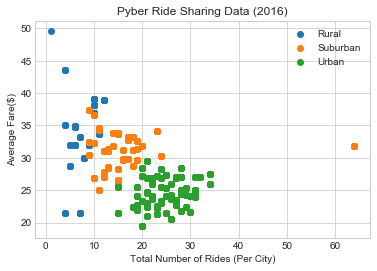

In [150]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)
plt.style.use('seaborn-whitegrid')
fig, AFC = plt.subplots()

colors = ["Gold","lightskyblue", "lightcoral"]
#sns.palplot(sns.xkcd_palette(colors))

for c, df in pyber_df.groupby('type'): #need to change colors used for types
    AFC. scatter(df['Ttl_ride'], df['Avg_fare'], label=c) # need to change colors c='colors' and points by size using s=['driver_count']
    AFC.legend()
AFC.set_title('Pyber Ride Sharing Data (2016)')
AFC.set_xlabel('Total Number of Rides (Per City)')
AFC.set_ylabel('Average Fare($)')


In [137]:
# In addition, you will be expected to produce the following three pie charts:

pyber_df['Ttl_fare'] = pyber_df['fare'].groupby(pyber_df['type']).transform('sum')
pyber_df['Total_ride']= pyber_df['Ttl_ride'].groupby(pyber_df['type']).transform('sum')
pyber_df['Total_driver']=pyber_df['driver_count'].groupby(pyber_df['type']).transform('sum')

type=pyber_df.type.unique()
Total_fare= pyber_df.Ttl_fare.unique()
Total_ride=pyber_df.Total_ride.unique()
Total_driver=pyber_df.Total_driver.unique()


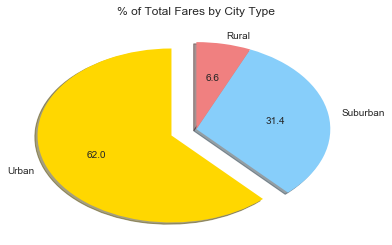

In [141]:
# * % of Total Fares by City Type
explode = (0.2, 0, 0)
plt.title("% of Total Fares by City Type")
plt.pie(Total_fare, explode=explode, labels=type, autopct='%.1f', colors=colors, shadow=True, startangle=90)
#plt.axis("equal")
plt.show()

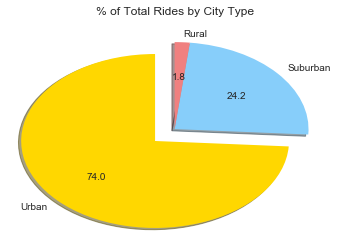

In [142]:
# * % of Total Rides by City Type
explode = (0.2, 0, 0)
plt.title("% of Total Rides by City Type")
plt.pie(Total_ride, explode=explode, labels=type, autopct='%.1f', colors=colors, shadow=True, startangle=90)
#plt.axis("equal")
plt.show()

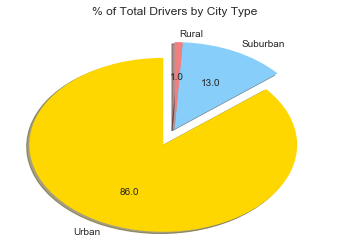

In [143]:
# * % of Total Drivers by City Type
explode = (0.2, 0, 0)
plt.title("% of Total Drivers by City Type")
plt.pie(Total_driver, explode=explode, labels=type, autopct='%.1f', colors=colors, shadow=True, startangle=90)
#plt.axis("equal")
plt.show()

In [ ]:
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
# * You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.

